In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calmap
from pandas_profiling import ProfileReport

In [23]:
df = pd.read_csv('/Users/riddhi/Downloads/supermarket_sales - Sheet1.csv')  #importing the dataset 
#change the path name above
df_copy = df.copy()
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")  # converting to timestamp 

In [7]:
df.set_index('Date', inplace=True)  #setting the index to date

In [8]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.220360e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

# Univariate Analysis

Below are the graphs for the mean, 25th and 75th percentile of the ratings by customers across branches

/Users/riddhi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


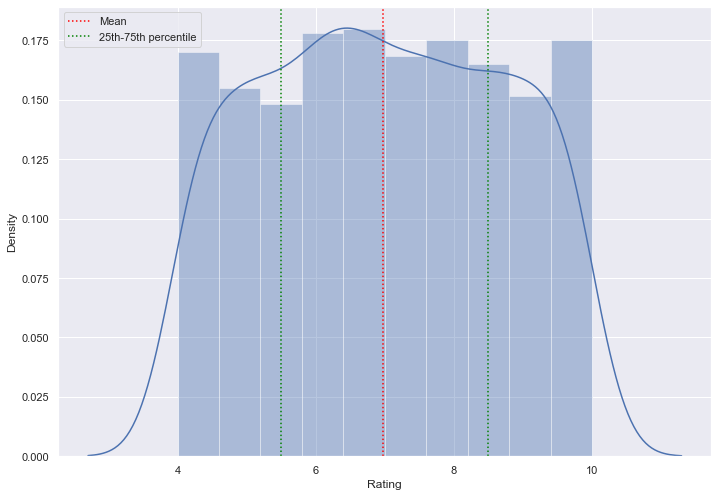

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='Red', ls=':', label='Mean')
plt.axvline(x=np.percentile(df['Rating'],25), c='Green', ls=':', label='25th-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75), c='Green', ls=':')
plt.legend()

As we can see, the customer ratings seem to be uniformly distributed and there isn't any left or right skew.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

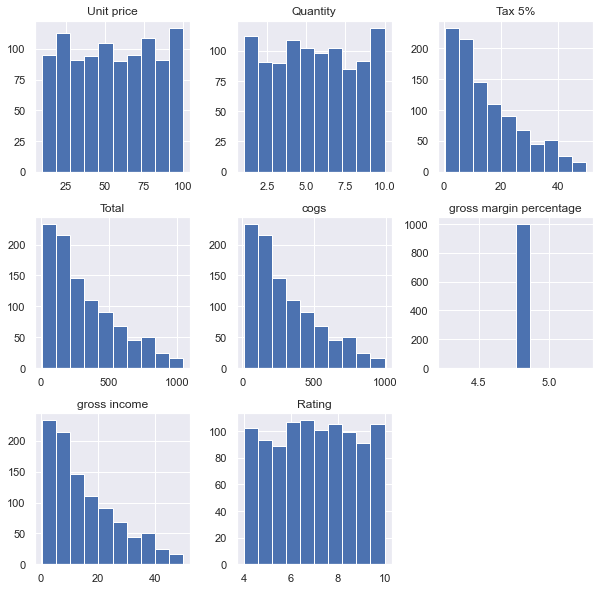

In [10]:
df.hist(figsize=(10,10))

The tax, total, cogs and gross income have a right skew.

/Users/riddhi/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Branch', ylabel='count'>

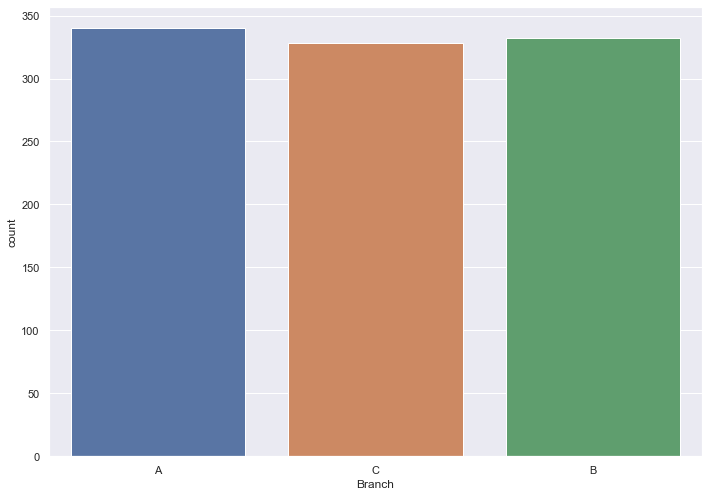

In [11]:
sns.countplot(df['Branch'])        #distribution of aggregate sales among different branches A, B and C

The sales are uniformly distributed over various branches.

/Users/riddhi/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Payment', ylabel='count'>

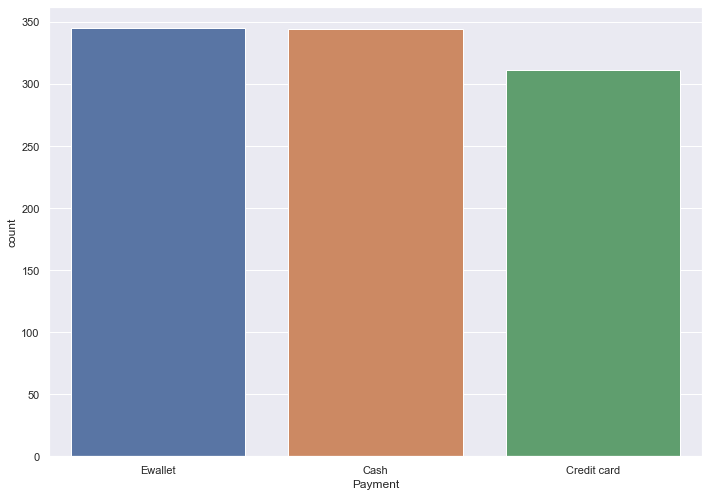

In [12]:
sns.countplot(df['Payment'])

# Bivariate Analysis

/Users/riddhi/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

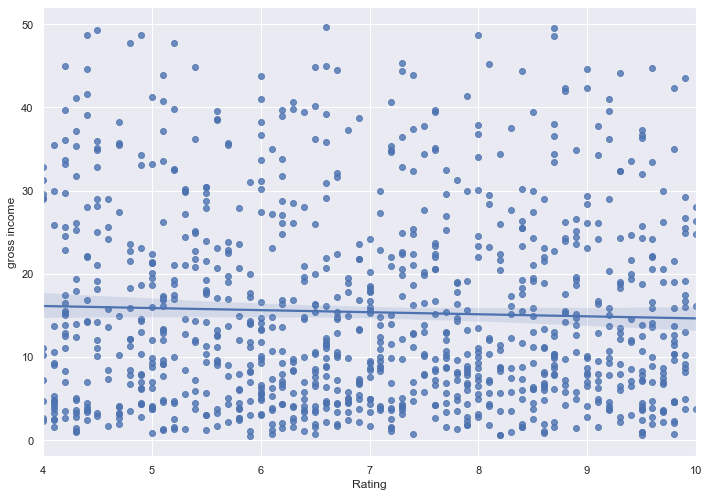

In [13]:
sns.regplot(df['Rating'],df['gross income'])  

There doesn't seem to be any relation between gross income and ratings.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

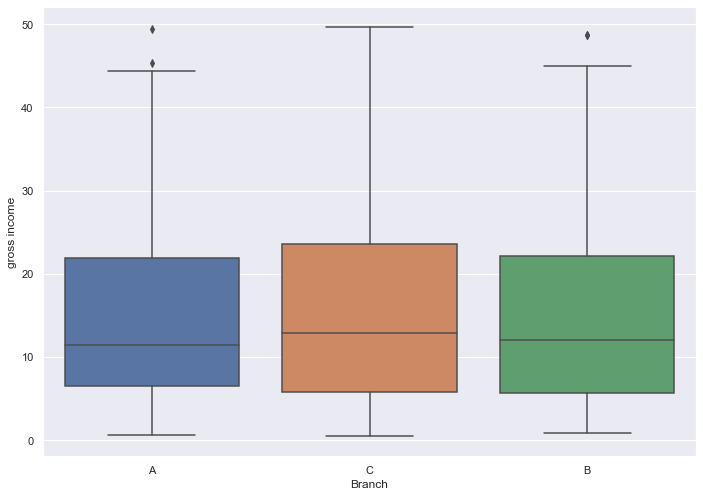

In [14]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

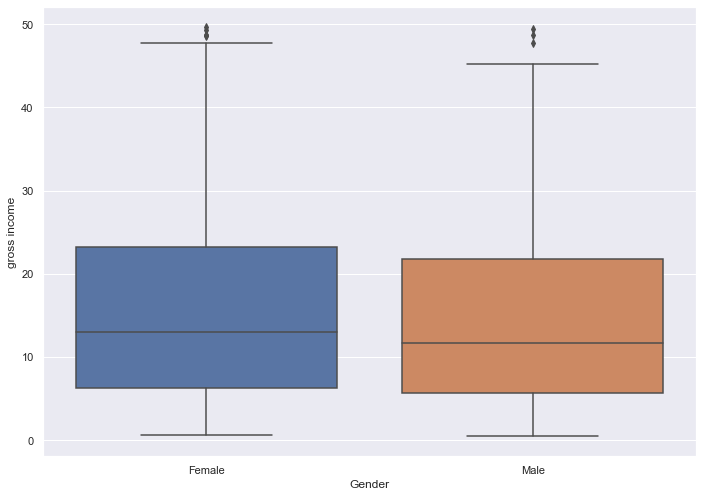

In [15]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Females seem to have contributed slightly more to the gross income.

In [18]:
df_groupedbydate = df.groupby('Date').mean()

<AxesSubplot:xlabel='Date', ylabel='gross income'>

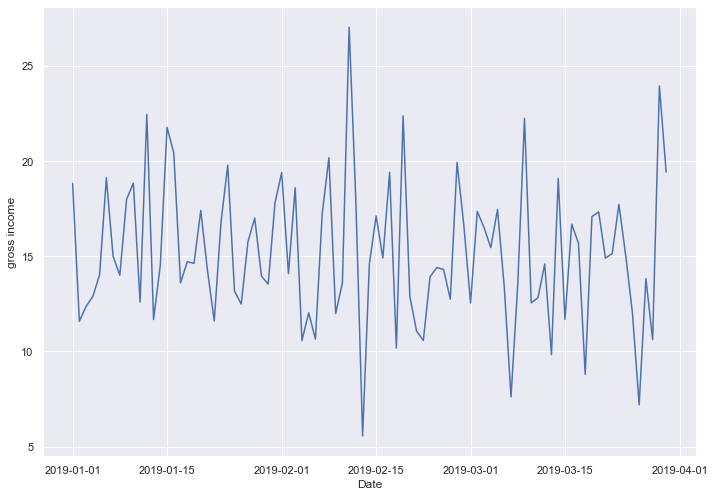

In [19]:
sns.lineplot(x=df_groupedbydate.index,y=df_groupedbydate['gross income'])

No particular trend is obeserved for the gross income over the span of 4 months.

In [20]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='Date'>

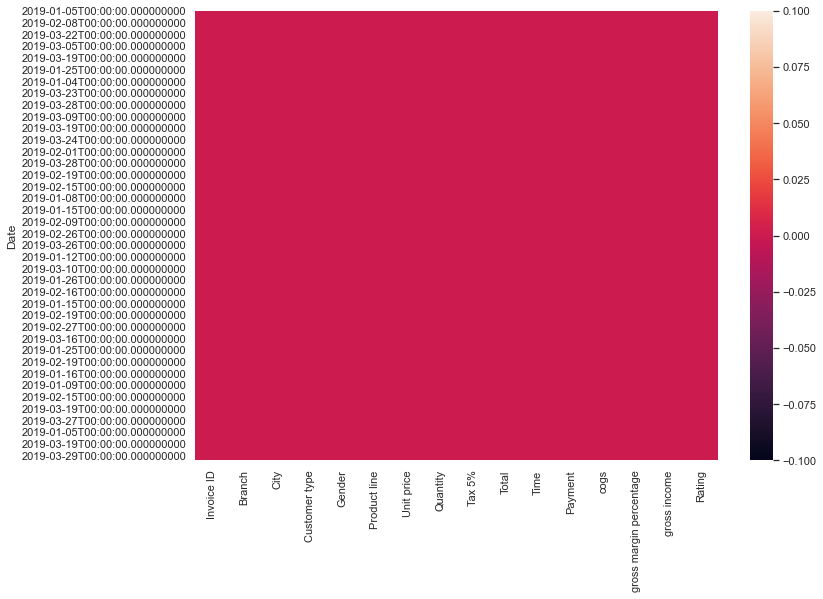

In [55]:
sns.heatmap(df.isnull())

In [21]:
df.fillna(df.mean())

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-01-29  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09  727-02-1313      A     Yangon        Member    Male   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   

                      Product line  Unit price  Quantity   Tax 5%      Total  \
Date                                                                           
2019-01-05       Health and beauty       74.69         7  26.1415   548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200    80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155   340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880   489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085   634.3785   
...                            ...         ...       ...      ...        ...   
2019-01-29       Health and beauty       40.35         1   2.0175    42.3675   
2019-03-02      Home and lifestyle       97.38        10  48.6900  1022.4900   
2019-02-09      Food and beverages       31.84         1   1.5920    33.4320   
2019-02-22      Home and lifestyle       65.82         1   3.2910    69.1110   
2019-02-18     Fashion accessories       88.34         7  30.9190   649.2990   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-01-29  13:46      Ewallet   40.35                 4.761905        2.0175   
2019-03-02  17:16      Ewallet  973.80                 4.761905       48.6900   
2019-02-09  13:22         Cash   31.84                 4.761905        1.5920   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-01-29     6.2  
2019-03-02     4.4  
2019-02-09     7.7  
2019-02-22     4.1  
2019-02-18     6.6  

[1000 rows x 16 columns]

In [24]:
prof = ProfileReport(df_copy) #using the initial dataset to get the original dataset's profile 
prof

In [60]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.71   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

<AxesSubplot:>

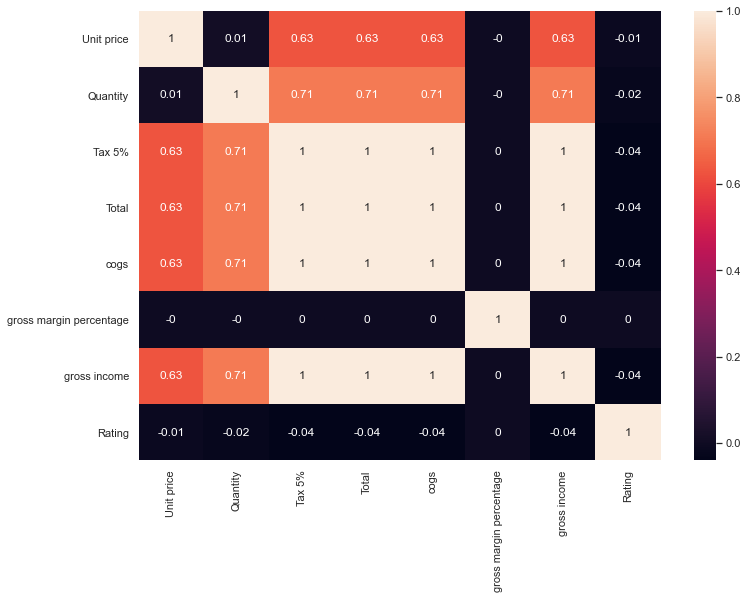

In [63]:
sns.heatmap(np.round(df.corr(),2), annot=True)

No unusual trends are observed from the above correlation matrix.